In [1]:
# In the name of God
# Mohammad Hossein Zehtab
# MFTN - Machine Learning
# Exercise Lecture 02 Univariate Linear Regression Without SciketLearn: Houses

# Importing Libraries

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Loading Data

In [2]:
%%writefile ./houses.csv
house_size,house_price
2104,3999
1600,3299
2400,3690
1416,2320
1985,2999
1534,3149
1427,1989
1380,2120
1494,2425
1940,2399
2000,3470
1890,3299
1268,2599
2300,4499
1320,2999
1236,1999
2609,4999
1767,2529
1888,2550
1604,2429
1962,2599
1100,2499
1458,4645
2526,4690
2200,4750
2637,2999
1839,3499
1000,1699
2040,3149
1811,2859
1437,2499
1239,2299
2132,3450
2162,2870
1664,3685
2238,3299
2567,3140
1200,2990
852,1799
1852,2999
1203,2395

Overwriting ./houses.csv


In [3]:
# Reading dataset
houses = pd.read_csv("houses.csv")
houses

,house_size,house_price
0,2104,3999
1,1600,3299
2,2400,3690
3,1416,2320
4,1985,2999
5,1534,3149
6,1427,1989
7,1380,2120
8,1494,2425
9,1940,2399


In [4]:
# Getting X, y and m
X = houses.values[:, 0]
y = houses.values[:, 1]
m = len(y)

In [11]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [13]:
print("X = \n", X)
print("y = \n", y)
print("m = ", m)

X = 
 [2104 1600 2400 1416 1985 1534 1427 1380 1494 1940 2000 1890 1268 2300
 1320 1236 2609 1767 1888 1604 1962 1100 1458 2526 2200 2637 1839 1000
 2040 1811 1437 1239 2132 2162 1664 2238 2567 1200  852 1852 1203]
y = 
 [3999 3299 3690 2320 2999 3149 1989 2120 2425 2399 3470 3299 2599 4499
 2999 1999 4999 2529 2550 2429 2599 2499 4645 4690 4750 2999 3499 1699
 3149 2859 2499 2299 3450 2870 3685 3299 3140 2990 1799 2999 2395]
m =  41


# Data Visualization

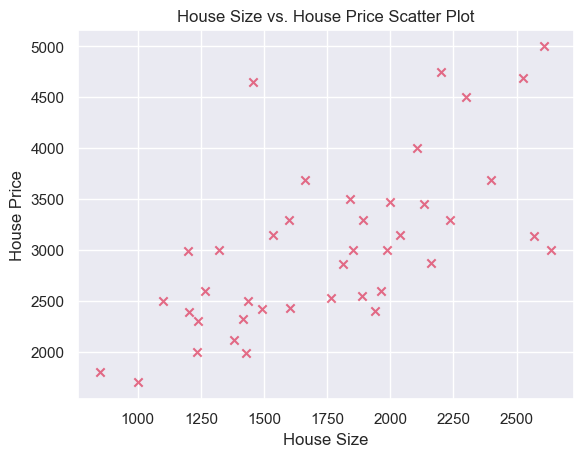

In [5]:
# Data visualization
plt.scatter(x = X,
            y = y,
            color = "crimson",
            marker = "x",
            alpha = 0.6)
plt.title("House Size vs. House Price Scatter Plot")
plt.xlabel("House Size")
plt.ylabel("House Price")
plt.show()

# Splitting Dataset

In [6]:
# Importing necessary library
from sklearn.model_selection import train_test_split

In [7]:
# Splitting dataset into train and test sets
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorization

In [8]:
X_train.shape

(32,)

In [9]:
# Vector representation of training data
m_train = len(X_train)
X_0_train = np.ones((m_train, 1))
X_1_train= X_train.reshape((m_train , 1))

# Stacking horizontally
X_train = np.hstack((X_0_train, X_1_train))
X_train.shape

(32, 2)

In [10]:
y_train.shape

(32,)

In [41]:
# Vector representation of training target
y_train = y_train.reshape((m_train, 1))
y_train.shape

(32, 1)

In [12]:
X_train.shape, y_train.shape

((32, 2), (32, 1))

In [13]:
# Vector representation of parameters
theta = np.zeros(shape=(2, 1))
theta

array([[0.],
       [0.]])

# Creating Hypothesis Function

In [48]:
def hypothesis_function(X, theta):
    '''
    Inner product of X and theta will give us predicted value for every training example.
    X.shape is (32*2)
    theta.shape is (2*1)
    the shape of predictions will be (32*1)
    '''
    predictions = X.dot(theta)
    return predictions

# Creating Cost Function

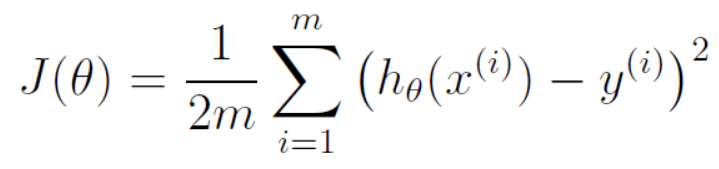

In [15]:
def cost_function(X_train, y_train, theta) -> float:
    '''
    Compute cost for linear regression.

    Input Parameters
    ----------------
    X : 2D array where each row represent the training example and each column represent the feature ndarray. Dimension(m x n)
      m= number of training examples
      n= number of features (including X_0 column of ones)
    y : 2D array of labels/target value for each traing example. dimension(m x 1)

    theta : 2D array of fitting parameters or weights. Dimension (n x 1)

    Output Parameters
    -----------------
    J : Scalar value.
    '''
    m = len(y_train)
    predictions = hypothesis_function(X_train, theta)
    errors = np.subtract(predictions, y_train)
    square_errors = np.square(errors)
    J = (1 / (2 * m)) * np.sum(square_errors)
    return J

In [16]:
# Computing cost for the current theta (0, 0)
cost = cost_function(X_train, y_train, theta)
print(f"The cost for theta_0 = {theta[0][0]} and theta_1 = {theta[1][0]} is: {cost}")

The cost for theta_0 = 0.0 and theta_1 = 0.0 is: 4849055.15625


# Gradient Descent Algorithm

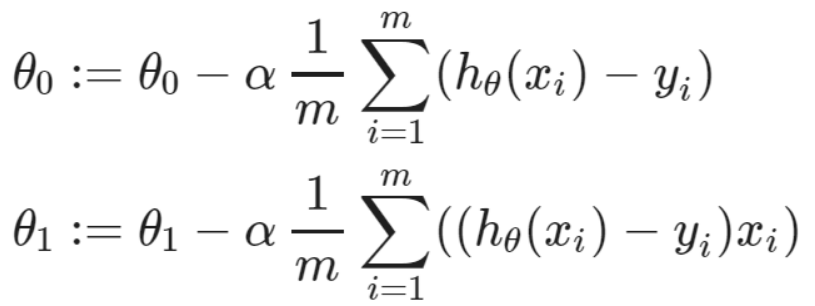

In [17]:
def gradient_descent(X_train, y_train, theta, alpha):
    '''
    Compute minimum cost and the best theta for linear regression.

    Input Parameters
    ----------------
    X : 2D array where each row represent the training example and each column represent the feature ndarray. Dimension(m x n)
      m= number of training examples
      n= number of features (including X_0 column of ones)
    y : 2D array of labels/target value for each traing example. dimension(m x 1)
    theta : 2D array of fitting parameters or weights. Dimension (n x 1)
    alpha : Learning rate. Scalar value 

    Output Parameters
    -----------------
    theta : Final Value. 2D array of fitting parameters or weights. Dimension (n x 1)
    cost_history: Conatins value of cost for each iteration. 2D array. Dimansion(m x 1)
    iterations: No of iterations. Scalar value.
    '''
    flag = 10000
    iter = 0
    cost_history = list()
    
    while flag > 0.01:
        iter += 1
        old_cost = cost_function(X_train, y_train, theta)
        cost_history.append(old_cost)

        predictions = hypothesis_function(X_train, theta)
        errors = predictions - y_train
        summation = X_train.T @ errors
        delta = alpha / m * summation
        theta -= delta

        new_cost = cost_function(X_train, y_train, theta)

        flag = abs(new_cost - old_cost)

    print(f"The algorithm converge after {iter} steps.")
    return theta, iter, cost_history

In [18]:
# Finding the optimal theta for fitting regression line
theta = np.zeros(shape=(2, 1))
print("The initial theta is: ", theta.flatten())
theta, iter, cost_history = gradient_descent(X_train, y_train, theta, alpha=0.01/3/3/3/3/3/3/3/3/3/3/3/3/3/3)
print("The optimal theta is: ", theta)

The initial theta is:  [0. 0.]
The algorithm converge after 1474 steps.
The optimal theta is:  [[1.08781629e-03]
 [1.70180238e+00]]


# Fitting Regressor Line

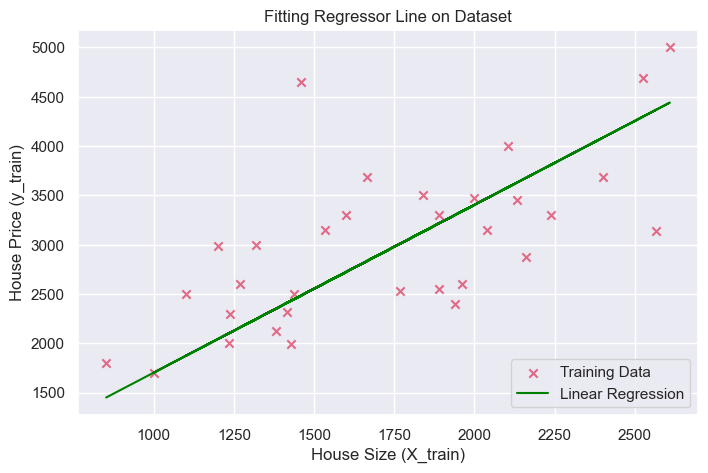

In [34]:
# Visualization
plt.figure(figsize=(8, 5))
plt.title("Fitting Regressor Line on Dataset")
plt.xlabel("House Size (X_train)")
plt.ylabel("House Price (y_train)")

# Drawing train dataset scatter plot
plt.scatter(x=X_train[:, 1],
            y=y_train,
            c="crimson",
            marker="x",
            alpha=0.6,
            label="Training Data")

# Drawing regressor line
plt.plot(X_train[:, 1],
         hypothesis_function(X_train, theta),
         color="green",
         label="Linear Regression")

plt.legend(loc=4)
plt.show()

# Convergence of Gradient Descent (Model Debugging)

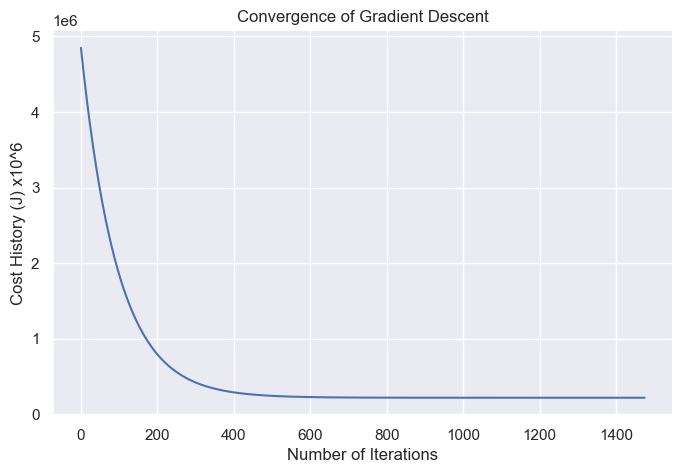

In [30]:
# Drawing iterations vs. cost history plot
plt.figure(figsize=(8, 5))
plt.title("Convergence of Gradient Descent")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost History (J) x10^6")

plt.plot(range(1, iter+1), 
         cost_history)

plt.show()

# Model Testing

In [40]:
# Vector representation of testing data
m_test = len(X_test)
X_0_test = np.ones(shape=(m_test, 1))
X_1_test = X_test.reshape(m_test, 1)

# Stacking horizontally
X_test = np.hstack((X_0_test, X_1_test))
X_test.shape

(9, 2)

In [43]:
# Vector representation of testing target
y_test = y_test.reshape(m_test, 1)
y_test.shape

(9, 1)

In [45]:
X_test.shape, y_test.shape

((9, 2), (9, 1))

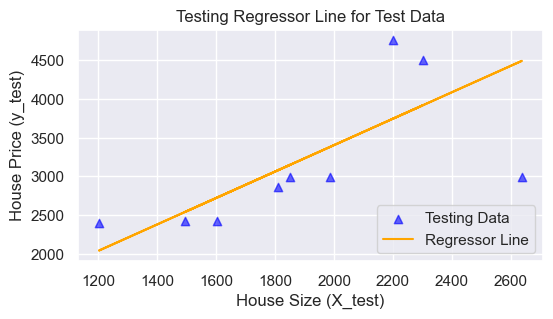

In [47]:
# Testing regressor line for test data
plt.figure(figsize=(6, 3))
plt.title("Testing Regressor Line for Test Data")
plt.xlabel("House Size (X_test)")
plt.ylabel("House Price (y_test)")

# Drawing test dataset scatter plot
plt.scatter(x=X_test[:, 1],
            y=y_test,
            color="blue",
            marker="^",
            alpha=0.6,
            label="Testing Data")

# Drawing Regressor Line
plt.plot(X_test[:, 1],
         hypothesis_function(X_test, theta),
         color="Orange",
         label="Regressor Line")

plt.legend(loc=4)
plt.show()

In [60]:
# Comparing predicted values and true values for test data
y_pred = (hypothesis_function(X_test, theta)).round(0)
y_true = y_test
pd.DataFrame({"y_true":y_true.flatten(), "y_pred":y_pred.flatten()})

,y_true,y_pred
0,4750,3744.0
1,4499,3914.0
2,2425,2542.0
3,2999,4488.0
4,2999,3378.0
5,2395,2047.0
6,2429,2730.0
7,2999,3152.0
8,2859,3082.0


In [63]:
# Predicting house price for a house with size of 2450 ft^2
new_sample = np.array([1, 2450])
prediction = hypothesis_function(new_sample, theta)
print(f"The predicted price for a house with the size of 2450 ft^2 is: {prediction[0].round(1)}")

The predicted price for a house with the size of 2450 ft^2 is: 4169.4
